# 🎬 Netflix Titles - Exploratory Data Analysis

Welcome to this EDA notebook based on a public dataset of Netflix titles, including both movies and TV shows.

The objective of this analysis is to explore trends in content type, production countries, release years, durations, and genres. The dataset also includes metadata such as director, cast, ratings, and descriptions - ready for you to take a dive into your favorite Netflix content!

## 🔎 Key Questions Explored
- How is Netflix content distributed by type (movie vs. TV show)?
- What are the top-producing countries?
- How has Netflix's content catalog evolved over the years?
- What are the most common content ratings and categories?
- Are there patterns in duration or format by type?

> 💬 **Note:** This project was developed as part of my Data Analyst tranining at the **Experience Design Institut (XDi)** and uses a dataset provided by the course for educational purposes. 

### Preparation

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
# Make sure that the file 'netflix_titles.csv' is located in the same local directory as this notebook, otherwise 
# the following line of code would not work!
netflix_data = pd.read_csv('netflix_titles.csv')

In [13]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 📊 EDA

Q1: Which are the top 10 countries providing the most countent on Netflix?

In [15]:
#Top 10 Countries providing the most content
top_countries = netflix_data['country'].value_counts().head(10)

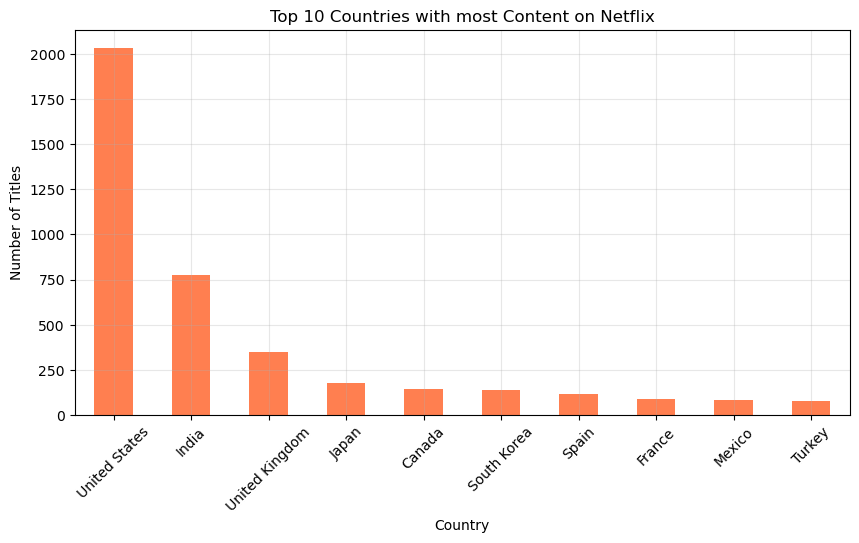

In [19]:
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

The United States provide the most content on Netflix - by far! 
India as the 2nd biggest contributor accumulates only roughly a third compared to the US. 
Ranks 5 to 10 almost even each other out, with roughly +130 titles.

Q2: How do the two main content types (Movie, TV Show) distribute?

In [113]:
#Distribution of content types on Netflix
netflix_data.groupby(by="type").type.count().to_frame().rename(columns={'type':'Count'})

,Count
type,
Movie,4265
TV Show,1969


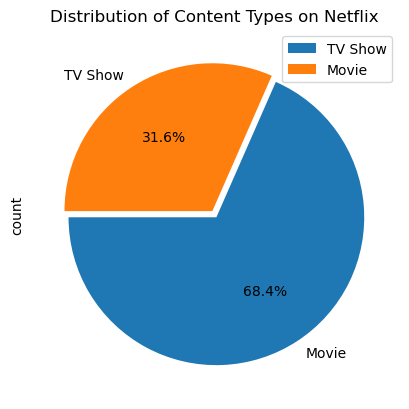

In [121]:
#Visualizing
netflix_data.type.value_counts().plot(kind='pie', startangle=180, autopct = '%1.1f%%', explode=(0.025,0.025))
plt.title('Distribution of Content Types on Netflix')
plt.legend(['TV Show','Movie'])
plt.show()

The pie chart shows that roughly 2/3 of the entire content catalog are movies, while not even 1/3 is compiled by TV shows.
Interesting food for thought for future analysis: How has this evolved over time, as it seems like TV Shows have become more popular over the last years? Can a trend be detected?

Q3: How do content categories / genres distribute across Netflix?

In [143]:
#Filtering genres
filtered_genres = netflix_data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

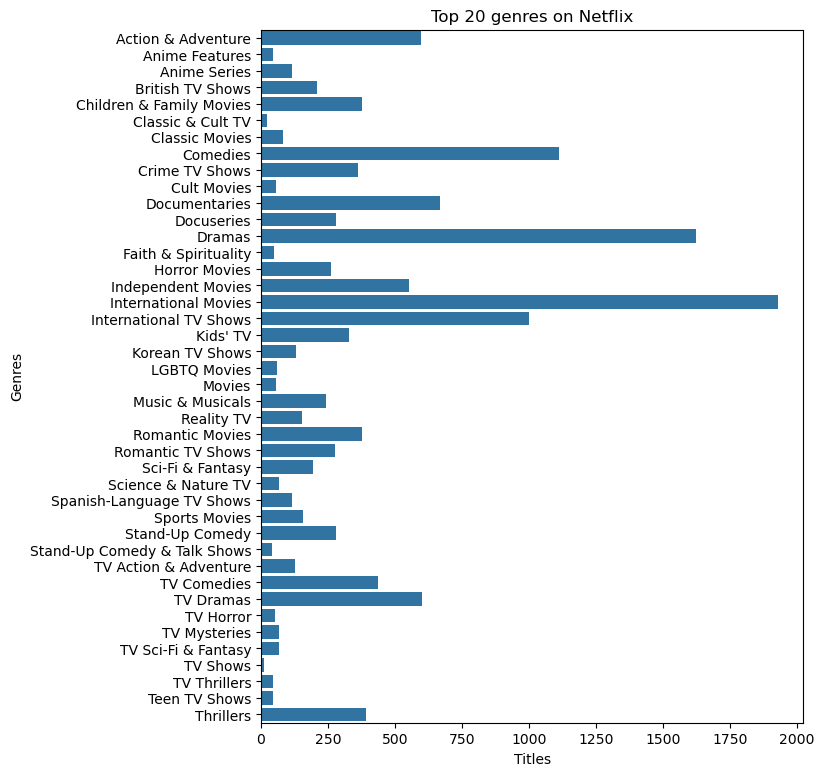

In [170]:
#Distribution of genres on Netflix
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres.sort_values())
plt.title('Top 20 genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

The genres with the most content on Netflix are 
- International Movies
- Dramas
- Comedies

Q4: Which directors produced the most content on Netflix?

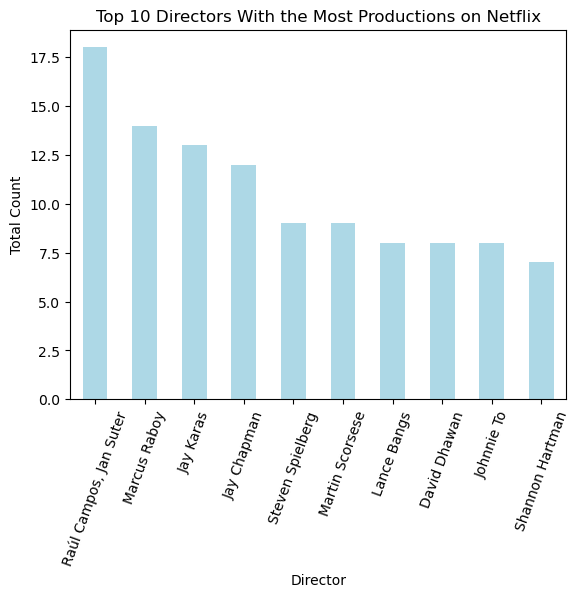

In [34]:
#Visualizing
top_10_directors = netflix_data['director'].value_counts().head(10)

top_10_directors.plot(kind='bar', color='lightblue')
plt.title('Top 10 Directors With the Most Productions on Netflix')
plt.xlabel('Director')
plt.ylabel('Total Count')
plt.xticks(rotation=70)
plt.show()

Q5: What is the distribution of age ratings across Netflix?

In [54]:
#Distribution of ratings
ratings = netflix_data['rating'].value_counts().to_frame()
ratings

,count
rating,
TV-MA,2027
TV-14,1698
TV-PG,701
R,508
PG-13,286
NR,218
PG,184
TV-Y7,169
TV-G,149


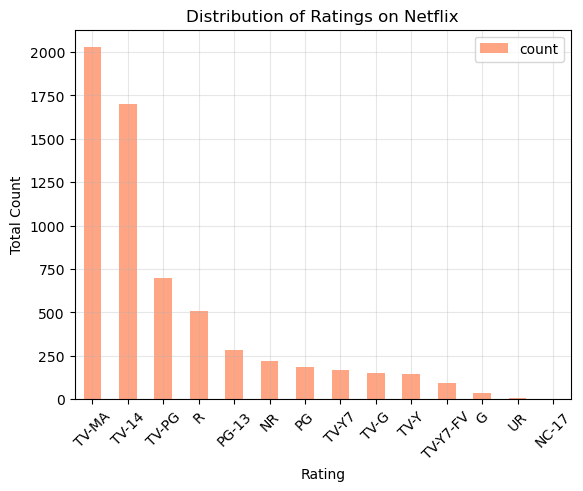

In [50]:
#Visualizing
ratings.plot(kind='bar', alpha=0.7, color='coral')
plt.xticks(rotation=45)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.grid(True, alpha=0.3)
plt.show()

Q6: How is the relation between countries and the age rating? Which countries deliver the highest rating?

In [325]:
#Filtering for TV-MA and NC-17
age_df = netflix_data[netflix_data['rating'].isin(['TV-MA','NC-17'])].dropna(subset=['country'])

#Splitting countries
age_df['country'] = age_df['country'].str.split(', ')
age_df = age_df.explode('country')

#count per country
age_rating_counts = age_df['country'].value_counts()
age_rating_counts.head(10)

country
United States     737
India             198
United Kingdom    185
Spain             110
France            105
Canada             73
Mexico             65
Japan              51
South Korea        50
Argentina          45
Name: count, dtype: int64

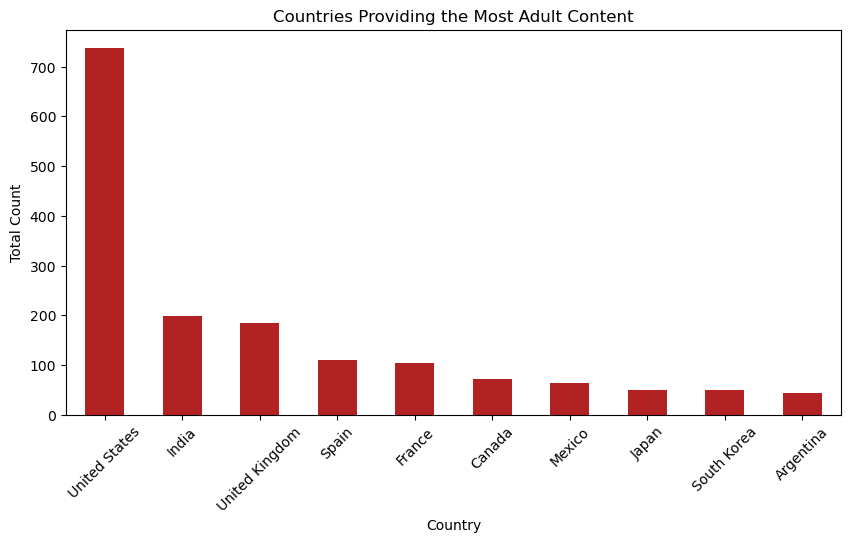

In [332]:
#Visualizing
plt.figure(figsize=(10,5))
age_rating_counts.head(10).plot(kind='bar', color='firebrick')
plt.title('Countries Providing the Most Adult Content')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

In a first step, I filtered the dataset by the two highest age ratings (TV-MA, NC-17). 
Plotting the dataframe shows that the US delivers the most adult content on Netflix. 
Again, other contributors are far behind the US in this category. 

Q7: How has the the Netflix content distribution developed over the years?

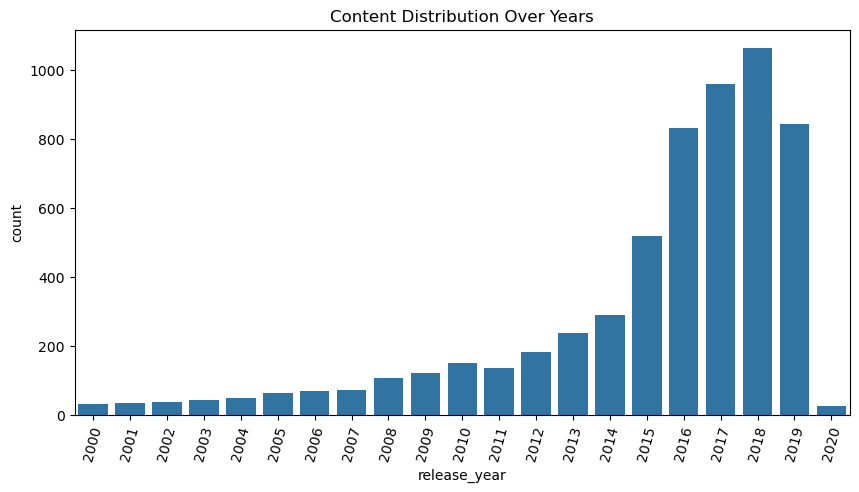

In [305]:
#Netflix releases over the years
selected_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

plt.figure(figsize=(10,5))
sns.countplot(x=netflix_data.release_year, order = selected_years)
plt.title('Content Distribution Over Years')
plt.xticks(rotation=75)
plt.show()

The plot shows a continuous increase in productions until 2018. 
The significant decrease will most likely be due to the Covid Pandemic.

❗️🧠 Further analysis could focus on the post-Covid era and see how quick (or not quick) the production industry re-established itself. Another component to be included here is the labor unrest that happened in the industry lately. This, too, will have had an impact on the production output.

Q8: What is the content count per genre category?

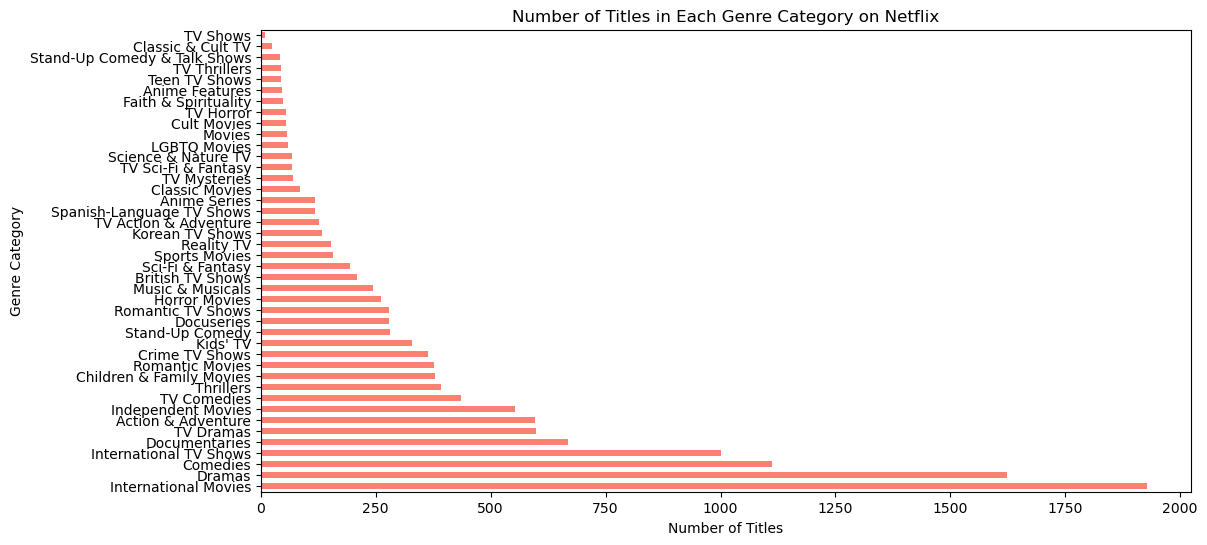

In [70]:
# Split the 'listed_in' column and count the occurrences
genres_count = netflix_data['listed_in'].str.split(', ').explode().value_counts()

# Plotting
plt.figure(figsize=(12, 6))
genres_count.plot(kind='barh', color='salmon')
plt.title('Number of Titles in Each Genre Category on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre Category')
plt.show()

Q9: How do release years distribute?

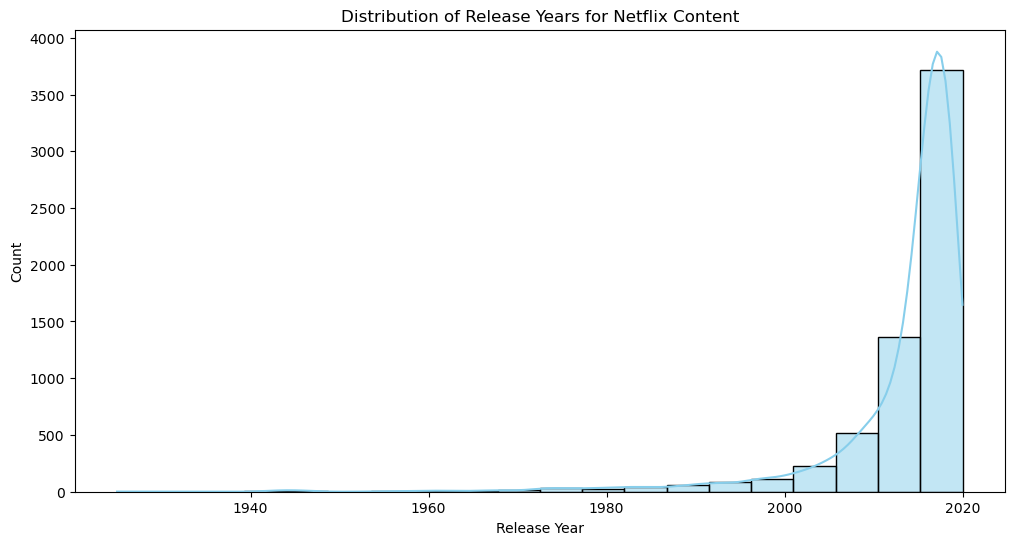

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', data=netflix_data, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Release Years for Netflix Content')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Q10: How many productions where accumulated by the top 5 countries?

In [383]:
#Top 5 Countries providing the most content
netflix_content_countries = netflix_data.groupby(by='country').country.agg('count').sort_values(ascending=False)
print(netflix_content_countries.head(5))
print(f'\nSumme: {netflix_content_countries.head(5).sum()}')

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

Summe: 3474


Q11: What is the average movie and TV show duration on Netflix?

In [88]:
#Splitting in movies and TV shows
netflix_movies_df = netflix_data[netflix_data['type'] == 'Movie'].copy()
netflix_shows_df = netflix_data[netflix_data['type'] == 'TV Show'].copy()

netflix_movies_df['minutes'] = netflix_movies_df['duration'].str.replace(' min', '').astype(int)
netflix_shows_df['seasons'] = netflix_shows_df['duration'].str.extract(r'(\d+)').astype(float)

In [90]:
avg_show_duration = netflix_shows_df['seasons'].mean()
print(f'Average TV Show Duration (Seasons): {avg_show_duration:.2f}')

Average TV Show Duration (Seasons): 1.78


In [92]:
avg_movie_duration = netflix_movies_df['minutes'].mean()   
print(f'Average Movie Duration (Min): {avg_movie_duration:.2f}')

Average Movie Duration (Min): 99.10


Q12: What are the most commong rating categories and how does it differ among countries?

/var/folders/0q/s7fj151s553_0czdxm4mtj680000gn/T/ipykernel_40669/1144613444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_ratings['country'] = netflix_ratings['country'].str.split(', ')


Top Ratings Worldwide:
 rating
TV-MA    2027
TV-14    1698
TV-PG     701
R         508
PG-13     286
NR        218
PG        184
TV-Y7     169
TV-G      149
TV-Y      143
Name: count, dtype: int64


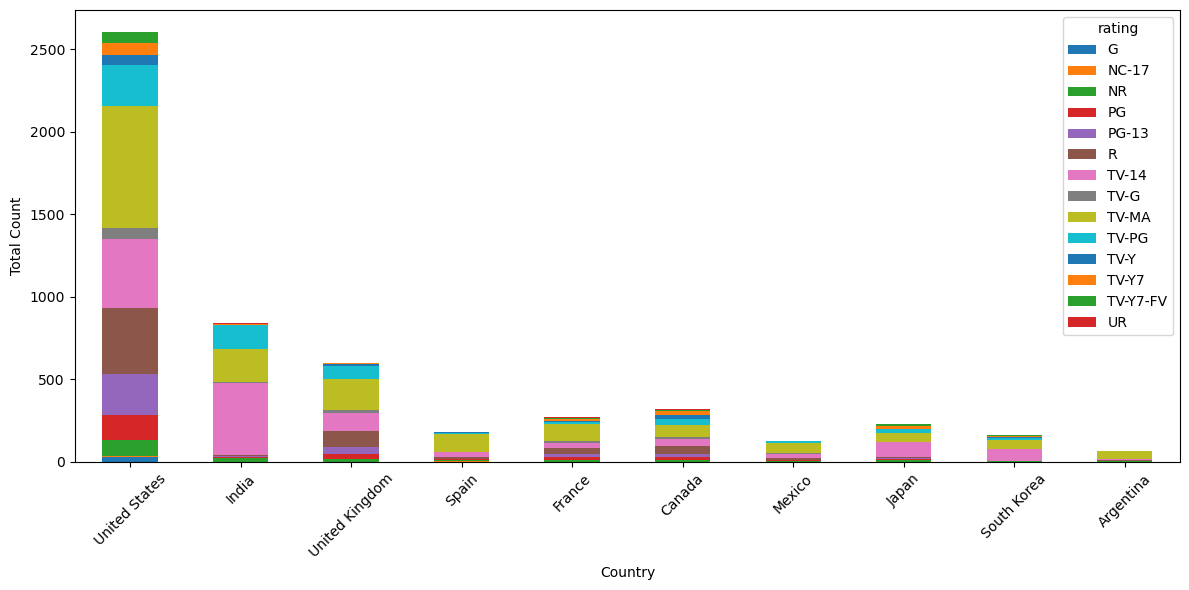

In [463]:
#Rating categories and variance per country
netflix_ratings = netflix_data.dropna(subset=['country','rating'])

netflix_ratings['country'] = netflix_ratings['country'].str.split(', ')
netflix_ratings = netflix_ratings.explode('country')

top_ratings = netflix_data['rating'].value_counts().head(10)
print('Top Ratings Worldwide:\n', top_ratings)

rating_by_country = netflix_ratings.groupby(['country','rating']).size().unstack(fill_value=0)
rating_by_country.sort_values(by='TV-MA', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

The most common rating category is TV-MA, followed by TV-14 and TV-PG.
Differnt cultural prefenreces among countries become clear. USA for example - as the main contributor of TV-MA content as seen before - consumes the most content of that rating category as well. 
The relative share in other countries of TV-MA content is significantly lower. 

India, on the other hand, prefers TV-14 content by far. 

R content, interestingly, seems to not be listed or not be really popular in some countries like India, Spain, Mexico, Japan, South Korea or Argentinia.

Q13: Is there a content release trend to be observed? How does it differ between Movies and TV Shows?

<Figure size 1600x800 with 0 Axes>

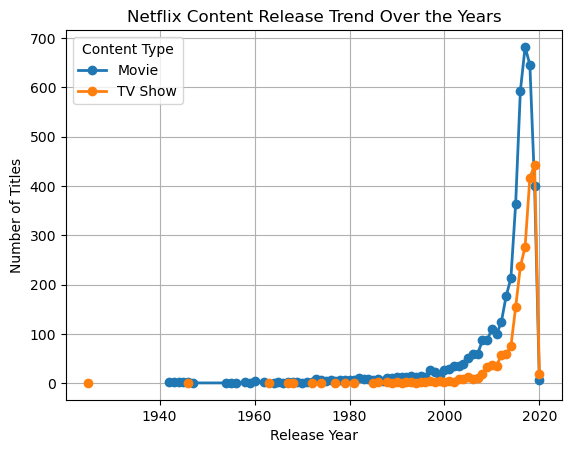

In [100]:
plt.figure(figsize=(16, 8))
release_trend = netflix_data.groupby(['release_year', 'type']).size().unstack()
release_trend.plot(kind='line', marker='o', linewidth=2)
plt.title('Netflix Content Release Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

The overall observations of the industry output were discussed above already in Q7.
What this plot delivers is an understanding of how the relative popularity between movies and TV shows has evolved over the years.
2019 was the first year with more TV shows than movies on Netflix. 

Again, for further analysis, a deeper look in to this and the post-Covid years, would be really interesting. 

Q15: What is the "Original" count in Netflix?

In [105]:
# Count the number of titles marked as 'Original'
original_titles_count = netflix_data['title'].str.contains('Original').sum()
print(f'Total titles marked as "Original": {original_titles_count}')

Total titles marked as "Original": 3


Interestingly, only three productions were Netflix Originals in this 2020 data set. 
With a more recent perspective and the current Netflix library in mind, this seems almost unbelievable. 
Netflix-owned content has become increasingly popular over the years. 

Again, it is highly advised for future analytics to look into this and find further insights.